# Visualization

Adapted from material by Ani Adhikari, Suraj Rampure, and Fernando Pérez and Josh Hug and Narges Norouzi


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
births = pd.read_csv('data/baby.csv')

In [ ]:
births.head()

In [ ]:
births.shape

# Visualizing Distributions: Qualitative Variables
## Bar Plots

We often use bar plots to display distributions of a categorical variable:

In [ ]:
babies = births['Maternal Smoker'].value_counts()


In [ ]:
import matplotlib.pyplot as plt

plt.bar(babies.index,babies.values);


In [ ]:
import seaborn as sns

sns.countplot(data = births, x = 'Maternal Smoker');

In [ ]:
import plotly.express as px
px.histogram(births, x = 'Maternal Smoker', color = 'Maternal Smoker')

In [ ]:
births['Maternal Smoker'].value_counts().plot(kind='bar')

# Visualizing Distributions:  Quantitative Variables

In [ ]:
sns.countplot(data = births, x = 'Maternal Pregnancy Weight');

In [ ]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', bins = 20);

In [ ]:
px.histogram(births, x = 'Maternal Pregnancy Weight')

In [ ]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight');

In [ ]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', stat= 'density')

In [ ]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', stat='density', kde = True);


In [ ]:
p10= np.percentile(births['Maternal Pregnancy Weight'], 10)


births['category'] = None
births.loc[(births['Birth Weight'] <= p10), 'category'] = 'Less than the 10th percentile'
births.loc[(births['Birth Weight'] > p10) , 'category'] = 'Greater than the 10th percentile'

sns.histplot(births, x = 'Birth Weight', hue = 'category', bins = 36, stat='density');

births.drop(columns = ['category'], inplace = True)

#Mark the 10th percentile on the graph
plt.scatter(p10, -.001, marker='^', color='red', s=400)

print(p10)

In [ ]:
q1, median, q3 = np.percentile(births['Birth Weight'], [25, 50, 75])
iqr = q3 - q1

births['category'] = None
births.loc[(births['Birth Weight'] < q1) | (births['Birth Weight'] > q3), 'category'] = 'Outside of the middle 50%'
births.loc[(births['Birth Weight'] > q1) & (births['Birth Weight'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(births, x = 'Birth Weight', hue = 'category', bins = 30, stat = "density");

births.drop(columns = ['category'], inplace = True)


plt.scatter(q1, -.001, marker='^', color='orange', s=400)

plt.scatter(median, -.001, marker='^', color='red', s=400)

plt.scatter(q3, -.001, marker='^', color='green', s=400)

display([q1, median, q3])

## Box Plots

In [ ]:
plt.figure(figsize = (3, 6))
sns.boxplot(data = births, y = 'Birth Weight');

In [ ]:
bweights = births['Birth Weight']
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1


q1, q2, q3

## Violin Plots

In [ ]:
plt.figure(figsize = (3, 6))
sns.violinplot(data = births, y = 'Birth Weight');


In [ ]:
#You can put a boxplot inside a violin plot...

px.violin(births, y = "Birth Weight", box=True, width=400)

## Describing Distributions

In [ ]:
median = births['Maternal Pregnancy Weight'].median()
mean = births['Maternal Pregnancy Weight'].mean()

print("Median", median)
print("Mean", mean)

# Visualizing Relationships Between Variables

## Relationships Between 2 Quantitative Variables

## Scatter plots

In [ ]:
births.head()

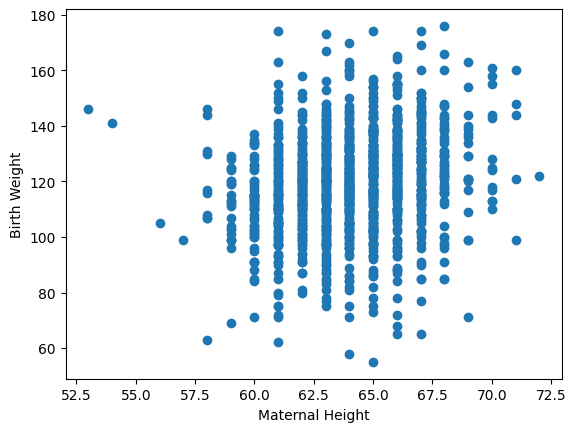

In [3]:
plt.scatter(births['Maternal Height'], births['Birth Weight']);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

Most `matplotlib` functions also accept a `data=` keyword, and when using this mode, you can then refer to x and y as names of columns in the `data` DataFrame, instead of passing the series explicitly:

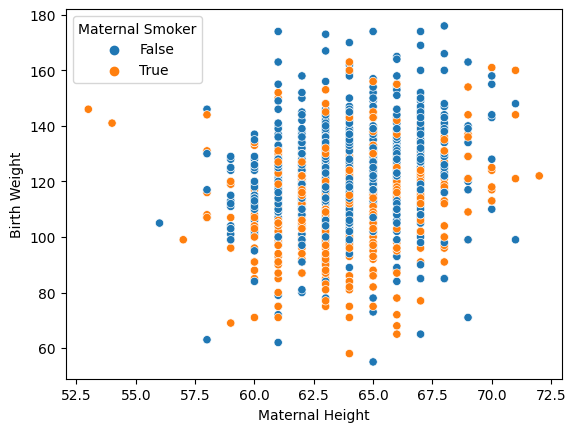

In [5]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight',hue = 'Maternal Smoker');

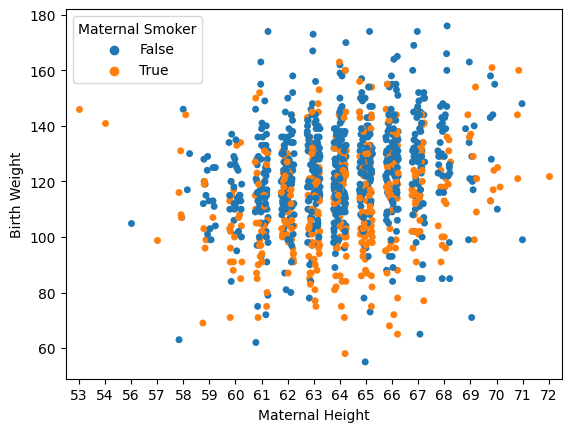

In [7]:
# We can add some "jittering" to the data to help deal with overplotting

sns.stripplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker', jitter = 0.25);

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

## Hex plots and contour plots

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'hex');

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'kde', fill = True);

## Relationships Between Mixed Variables

## Side by side box plots and violin plots

### Overlaid Histograms

In [ ]:
# OPTION 1: Using displot
sns.displot(data = births, x = 'Birth Weight', stat = 'density', hue = 'Maternal Smoker');

In [ ]:
#OPTION 2;  Using Matplotlib

non_smoker = births[births["Maternal Smoker"]==False]

smoker = births[births["Maternal Smoker"]==True]

plt.hist(non_smoker["Birth Weight"], density=True, alpha=0.5);

plt.hist(smoker["Birth Weight"], density=True, alpha =.7);

In [ ]:
sns.displot(data = births, x = 'Birth Weight', kde = True, stat = 'density', hue = 'Maternal Smoker');

In [ ]:
sns.displot(data = births, x = 'Birth Weight', kind = 'kde', hue = 'Maternal Smoker');

In [ ]:
plt.figure(figsize=(5, 8))
sns.boxplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

In [ ]:
plt.figure(figsize=(5, 8))
sns.violinplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

In [ ]:
plt.figure(figsize=(5, 8))
sns.violinplot(data = births, x = 'Maternal Smoker', y = 'Birth Weight');

## Visualizing More than 2 Variables

In [ ]:
sns.lmplot(data = births, x = 'Maternal Height', y = 'Birth Weight', 
           ci = False, hue = 'Maternal Smoker');

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

In [ ]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind = 'kde', hue = 'Maternal Smoker');